# importing the Depenndencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Data Collection & Analysis

In [2]:
#loading the data from csv file to a pandas DataFrame
data = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')
data

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [3]:
#Getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   Published Airline            15007 non-null  object
 4   Published Airline IATA Code  14953 non-null  object
 5   GEO Summary                  15007 non-null  object
 6   GEO Region                   15007 non-null  object
 7   Activity Type Code           15007 non-null  object
 8   Price Category Code          15007 non-null  object
 9   Terminal                     15007 non-null  object
 10  Boarding Area                15007 non-null  object
 11  Passenger Count              15007 non-null  int64 
 12  Adjusted Activity Type Code  15007 non-null  object
 13  Adjusted Passenger Count     15

In [4]:
#Checking for missing values
data.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [5]:
data.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count', 'Year', 'Month'],
      dtype='object')

In [6]:
# Remove column name 
data = data.drop(columns=['Activity Period'])

In [7]:
data.columns=data.columns.str.replace(" ","_").str.lower()

In [8]:
data.columns

Index(['operating_airline', 'operating_airline_iata_code', 'published_airline',
       'published_airline_iata_code', 'geo_summary', 'geo_region',
       'activity_type_code', 'price_category_code', 'terminal',
       'boarding_area', 'passenger_count', 'adjusted_activity_type_code',
       'adjusted_passenger_count', 'year', 'month'],
      dtype='object')

In [9]:
data.shape

(15007, 15)

In [10]:
data.dtypes

operating_airline              object
operating_airline_iata_code    object
published_airline              object
published_airline_iata_code    object
geo_summary                    object
geo_region                     object
activity_type_code             object
price_category_code            object
terminal                       object
boarding_area                  object
passenger_count                 int64
adjusted_activity_type_code    object
adjusted_passenger_count        int64
year                            int64
month                          object
dtype: object

In [11]:
data.describe()

,passenger_count,adjusted_passenger_count,year
count,15007.000000,15007.000000,15007.000000
mean,29240.521090,29331.917105,2010.385220
std,58319.509284,58284.182219,3.137589
min,1.000000,1.000000,2005.000000
25%,5373.500000,5495.500000,2008.000000
50%,9210.000000,9354.000000,2010.000000
75%,21158.500000,21182.000000,2013.000000
max,659837.000000,659837.000000,2016.000000


In [12]:
data.sort_values("passenger_count",ascending=True).head(15)

,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,adjusted_activity_type_code,adjusted_passenger_count,year,month
3501,Ameriflight,A8,Ameriflight,A8,Domestic,US,Deplaned,Other,Other,Other,1,Deplaned,1,2008,January
1864,Ameriflight,A8,Ameriflight,A8,Domestic,US,Deplaned,Other,Other,Other,1,Deplaned,1,2006,November
1865,Ameriflight,A8,Ameriflight,A8,Domestic,US,Enplaned,Other,Other,Other,1,Enplaned,1,2006,November
13268,United Airlines,UA,United Airlines,UA,Domestic,US,Thru / Transit,Other,International,G,1,Thru / Transit * 2,2,2015,January
13046,United Airlines,UA,United Airlines,UA,International,Canada,Thru / Transit,Other,International,G,1,Thru / Transit * 2,2,2014,November
4218,Ameriflight,A8,Ameriflight,A8,Domestic,US,Deplaned,Other,Other,Other,1,Deplaned,1,2008,July
9065,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Mexico,Thru / Transit,Other,International,G,1,Thru / Transit * 2,2,2011,December
3674,Southwest Airlines,WN,Southwest Airlines,WN,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,1,Thru / Transit * 2,2,2008,February
13993,United Airlines,UA,United Airlines,UA,Domestic,US,Thru / Transit,Other,Terminal 3,E,1,Thru / Transit * 2,2,2015,July
3438,Southwest Airlines,WN,Southwest Airlines,WN,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2,Thru / Transit * 2,4,2007,December


In [13]:
data.sort_values("passenger_count",ascending=False).head(15) 

,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,adjusted_activity_type_code,adjusted_passenger_count,year,month
11331,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,F,659837,Deplaned,659837,2013,August
11332,United Airlines,UA,United Airlines,UA,Domestic,US,Enplaned,Other,Terminal 3,F,629003,Enplaned,629003,2013,August
11218,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,F,625885,Deplaned,625885,2013,July
11219,United Airlines,UA,United Airlines,UA,Domestic,US,Enplaned,Other,Terminal 3,F,622871,Enplaned,622871,2013,July
11566,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,F,573619,Deplaned,573619,2013,October
11567,United Airlines,UA,United Airlines,UA,Domestic,US,Enplaned,Other,Terminal 3,F,558030,Enplaned,558030,2013,October
11792,United Airlines,UA,United Airlines,UA,Domestic,US,Enplaned,Other,Terminal 3,F,556208,Enplaned,556208,2013,December
11791,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,F,553433,Deplaned,553433,2013,December
11449,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,F,548374,Deplaned,548374,2013,September
11450,United Airlines,UA,United Airlines,UA,Domestic,US,Enplaned,Other,Terminal 3,F,544302,Enplaned,544302,2013,September


In [14]:
data.groupby("month").describe()

passenger_count                                                     \
                    count          mean           std  min      25%      50%   
month                                                                          
April              1149.0  28813.577894  56293.933065  4.0  4987.00   9618.0   
August             1310.0  32636.380916  65568.506551  6.0  6129.00  10058.0   
December           1259.0  28723.198570  57566.020134  1.0  5493.00   9157.0   
February           1255.0  24258.407968  47569.006999  1.0  4605.00   7709.0   
January            1268.0  26094.370662  51294.880080  1.0  5194.75   9015.0   
July               1303.0  32657.033768  65309.479557  1.0  6230.50  10379.0   
June               1183.0  31886.650888  61424.496549  5.0  6052.00  10250.0   
March              1253.0  29359.807662  57519.653387  2.0  5277.00   9028.0   
May                1172.0  30340.417235  59000.174363  4.0  5479.50   9728.0   
November           1263.0  27702.751386  56175.549821  1.0  4994.50   8239.0   
October            1295.0  29645.857915  60490.122931  2.0  5038.50   9244.0   
September          1297.0  28725.348497  58236.294885  3.0  4971.00   8648.0   

                              adjusted_passenger_count                ...  \
                75%       max                    count          mean  ...   
month                                                                 ...   
April      20869.00  397287.0                   1149.0  28909.363795  ...   
August     24187.25  659837.0                   1310.0  32741.354198  ...   
December   19418.00  556208.0                   1259.0  28806.749801  ...   
February   16704.50  351096.0                   1255.0  24339.607171  ...   
January    18772.50  482915.0                   1268.0  26179.891167  ...   
July       24465.50  625885.0                   1303.0  32767.212586  ...   
June       23427.00  433650.0                   1183.0  31982.435334  ...   
March      20276.00  392302.0                   1253.0  29462.865922  ...   
May        22318.00  404581.0                   1172.0  30423.592150  ...   
November   18812.50  522199.0                   1263.0  27774.910530  ...   
October    21526.00  573619.0                   1295.0  29740.870270  ...   
September  20987.00  548374.0                   1297.0  28810.779491  ...   

                                 year                                         \
                75%       max   count         mean       std     min     25%   
month                                                                          
April      20869.00  397287.0  1149.0  2010.534378  2.868775  2006.0  2008.0   
August     24187.25  659837.0  1310.0  2009.966412  3.152178  2005.0  2007.0   
December   19418.00  556208.0  1259.0  2010.018268  3.177397  2005.0  2007.0   
February   16704.50  351096.0  1255.0  2011.078088  3.186438  2006.0  2008.0   
January    18772.50  482915.0  1268.0  2011.020505  3.193258  2006.0  2008.0   
July       24465.50  625885.0  1303.0  2009.983883  3.146288  2005.0  2007.0   
June       23427.00  433650.0  1183.0  2010.508030  2.862866  2006.0  2008.0   
March      20276.00  392302.0  1253.0  2011.054270  3.190980  2006.0  2008.0   
May        22318.00  404581.0  1172.0  2010.545222  2.869880  2006.0  2008.0   
November   18812.50  522199.0  1263.0  2010.019002  3.190162  2005.0  2007.0   
October    21539.50  573619.0  1295.0  2010.023166  3.183626  2005.0  2007.0   
September  20992.00  548374.0  1297.0  2009.959136  3.174313  2005.0  2007.0   

                                   
              50%     75%     max  
month                              
April      2011.0  2013.0  2015.0  
August     2010.0  2013.0  2015.0  
December   2010.0  2013.0  2015.0  
February   2011.0  2014.0  2016.0  
January    2011.0  2014.0  2016.0  
July       2010.0  2013.0  2015.0  
June       2010.0  2013.0  2015.0  
March      2011.0  2014.0  2016.0  
May        2011.0  2013.0  2015.0  
November   2010.0  2

In [15]:
data.groupby("month")["year"].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
April,1149.0,2010.534378,2.868775,2006.0,2008.0,2011.0,2013.0,2015.0
August,1310.0,2009.966412,3.152178,2005.0,2007.0,2010.0,2013.0,2015.0
December,1259.0,2010.018268,3.177397,2005.0,2007.0,2010.0,2013.0,2015.0
February,1255.0,2011.078088,3.186438,2006.0,2008.0,2011.0,2014.0,2016.0
January,1268.0,2011.020505,3.193258,2006.0,2008.0,2011.0,2014.0,2016.0
July,1303.0,2009.983883,3.146288,2005.0,2007.0,2010.0,2013.0,2015.0
June,1183.0,2010.508030,2.862866,2006.0,2008.0,2010.0,2013.0,2015.0
March,1253.0,2011.054270,3.190980,2006.0,2008.0,2011.0,2014.0,2016.0
May,1172.0,2010.545222,2.869880,2006.0,2008.0,2011.0,2013.0,2015.0


In [16]:
data.operating_airline_iata_code.fillna(method="ffill",inplace=True)
data.published_airline_iata_code.fillna(method="ffill",inplace=True)

In [17]:
data.isna().sum()

operating_airline              0
operating_airline_iata_code    0
published_airline              0
published_airline_iata_code    0
geo_summary                    0
geo_region                     0
activity_type_code             0
price_category_code            0
terminal                       0
boarding_area                  0
passenger_count                0
adjusted_activity_type_code    0
adjusted_passenger_count       0
year                           0
month                          0
dtype: int64

In [18]:
data

,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,adjusted_activity_type_code,adjusted_passenger_count,year,month
0,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


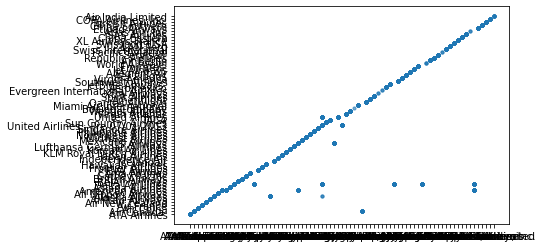

In [19]:
import matplotlib.pyplot as plt
plt.scatter(data.operating_airline, data.published_airline,  alpha = 0.6, s=10)

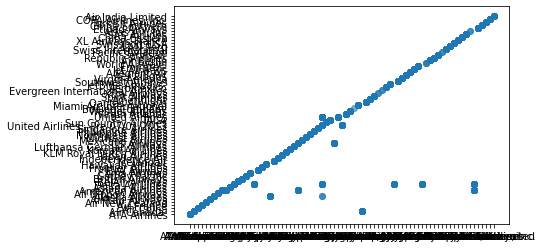

In [20]:
plt.scatter(data.operating_airline, data.published_airline,  alpha = 0.6)

In [21]:
cat_list=[]
num_list=[]

for i in data.columns:
    unique_val=len(data[i].unique())
    
    if unique_val<78:
        cat_list.append(i)
    else:
        num_list.append(i)

In [22]:
cat_list

['operating_airline',
 'operating_airline_iata_code',
 'published_airline',
 'published_airline_iata_code',
 'geo_summary',
 'geo_region',
 'activity_type_code',
 'price_category_code',
 'terminal',
 'boarding_area',
 'adjusted_activity_type_code',
 'year',
 'month']

In [23]:
num_list


['passenger_count', 'adjusted_passenger_count']

e:\Users\work\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Users\work\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


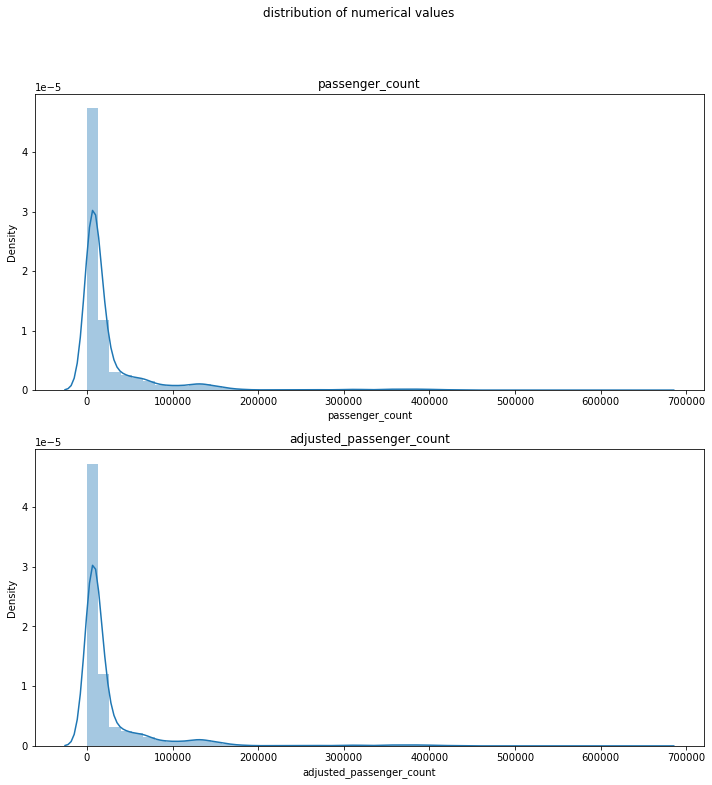

In [24]:
k=1
plt.figure(figsize=(12,12))
plt.tight_layout()
plt.suptitle("distribution of numerical values")


for i in data.loc[:,num_list]:
    plt.subplot(2,1,k)   
    sns.distplot(data[i])
    plt.title(i)
    k+=1


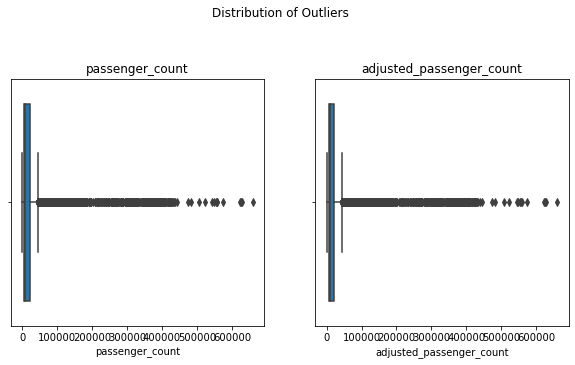

In [25]:
k=1
plt.figure(figsize=(10,10))
plt.suptitle("Distribution of Outliers")

for i in data.loc[:,num_list]:
    plt.subplot(2,2,k)
    sns.boxplot(x = i, data = data.loc[:,num_list])
    plt.title(i)
    k+=1

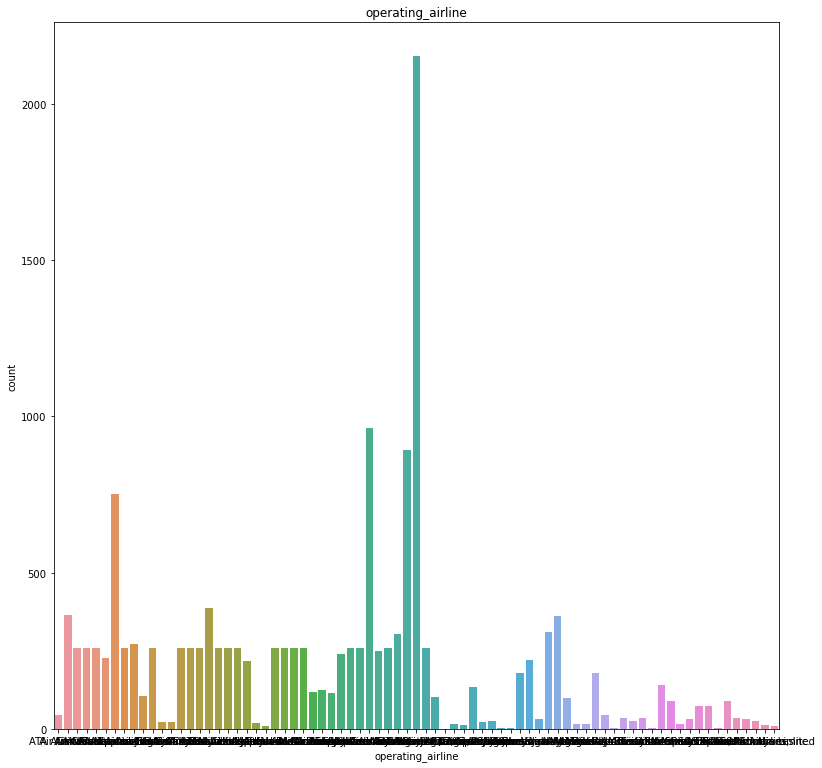

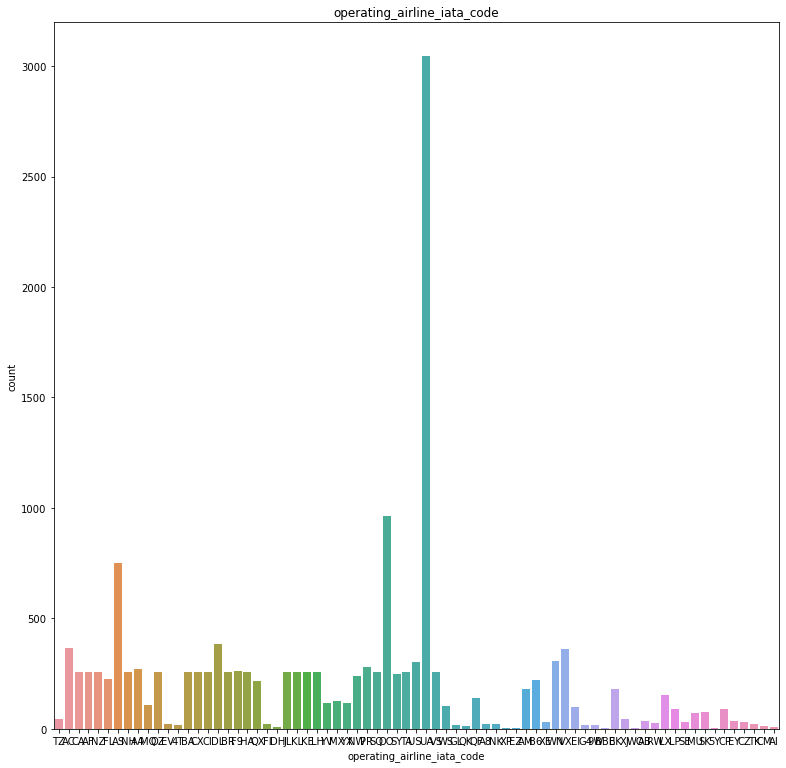

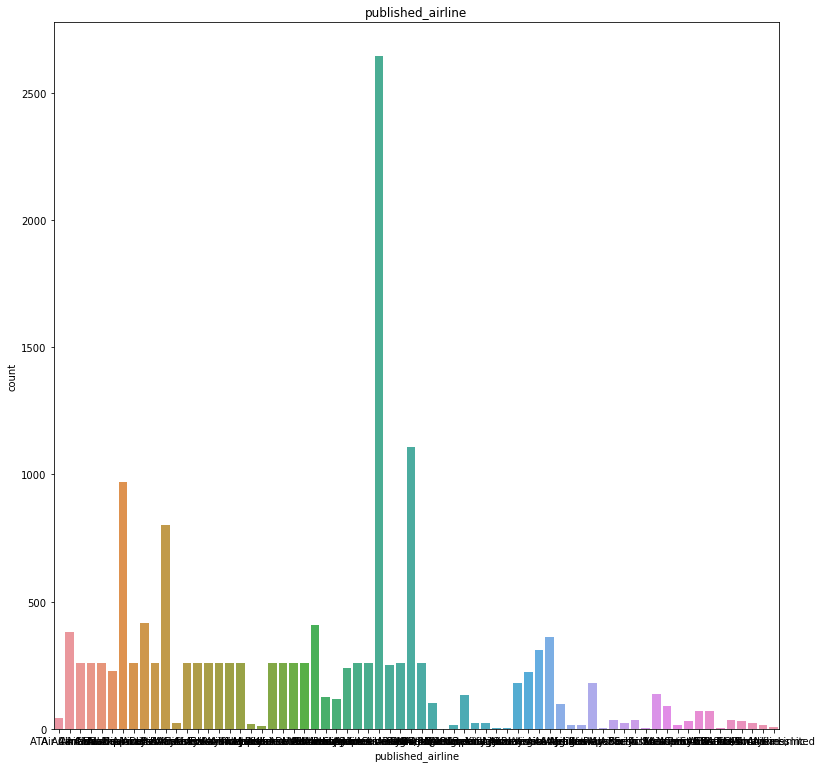

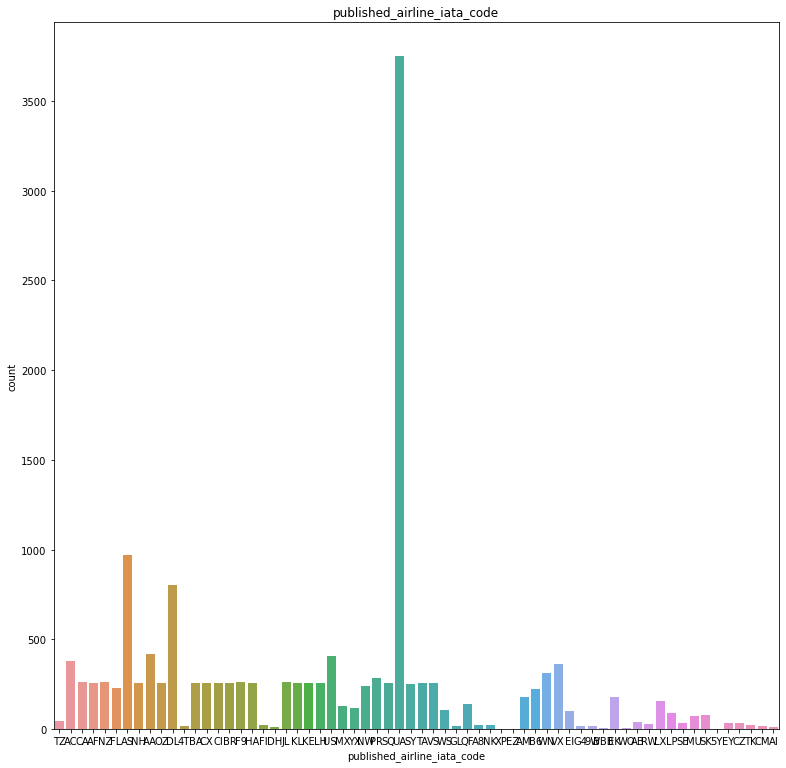

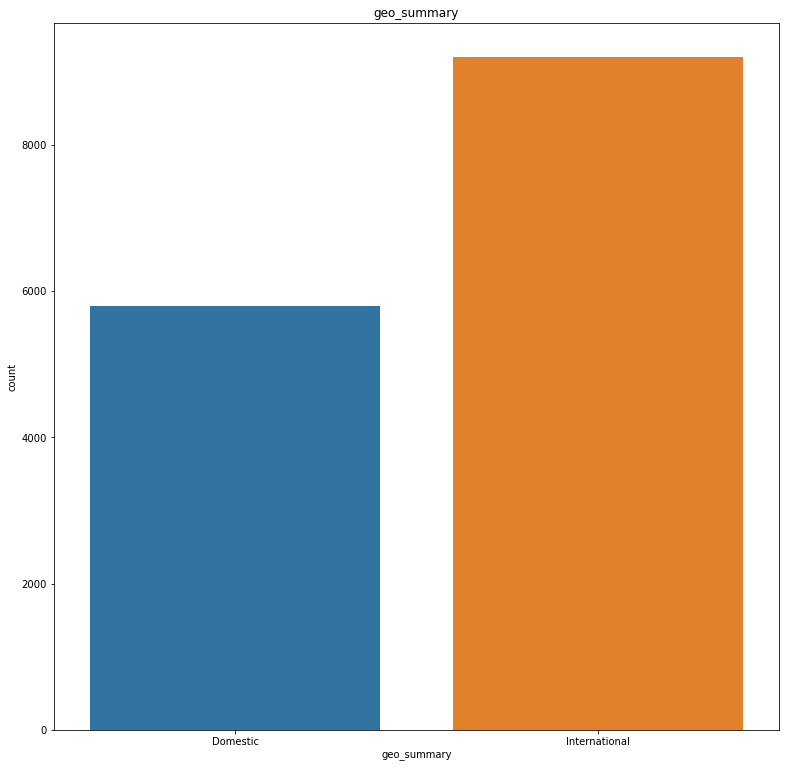

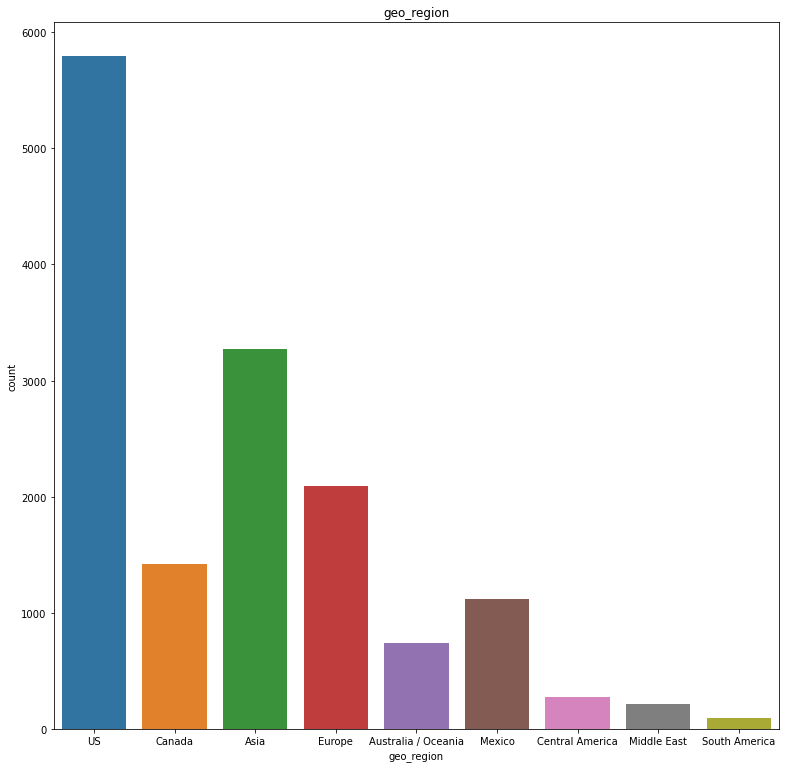

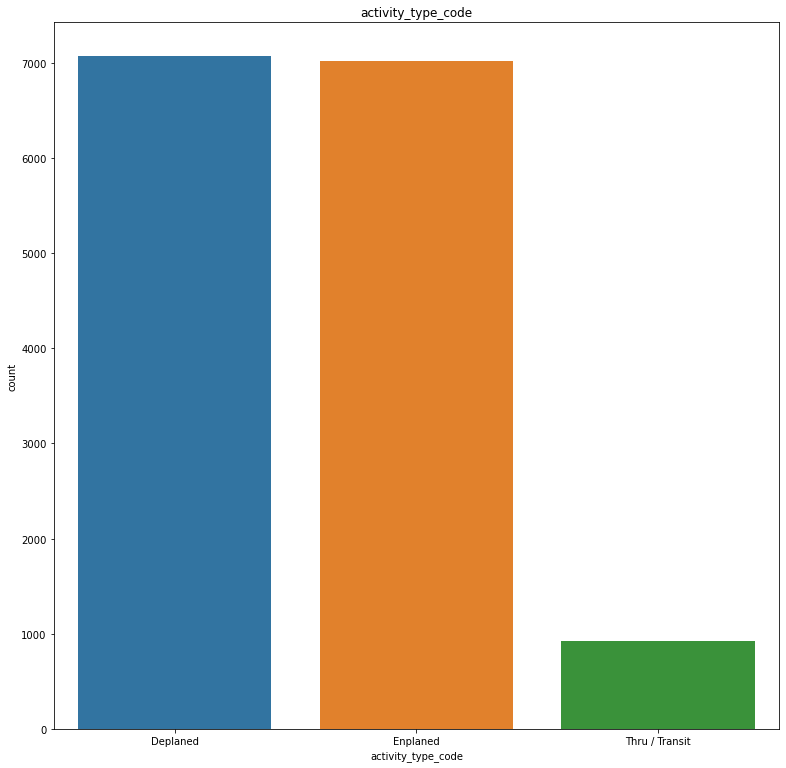

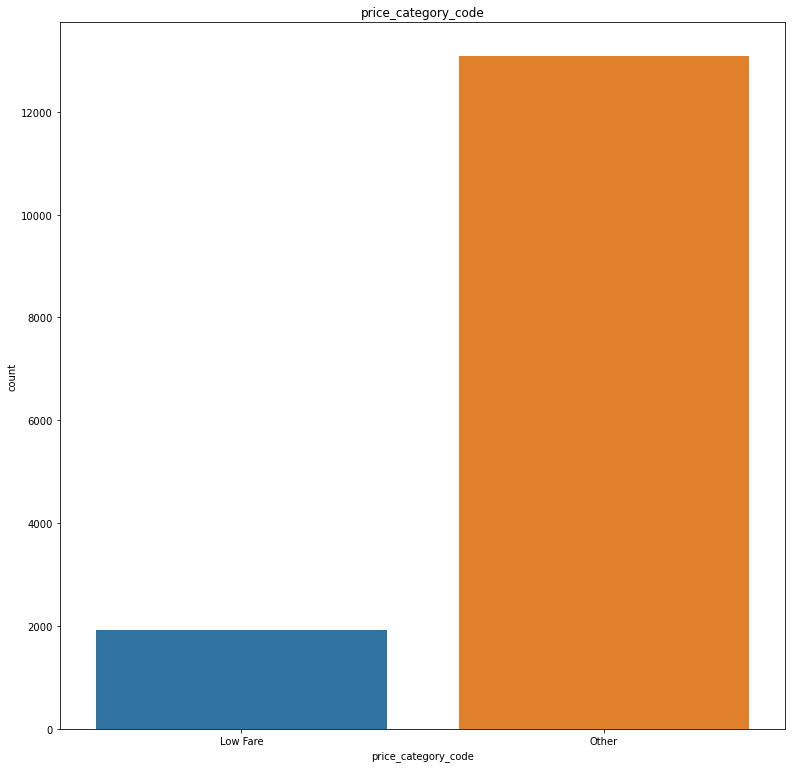

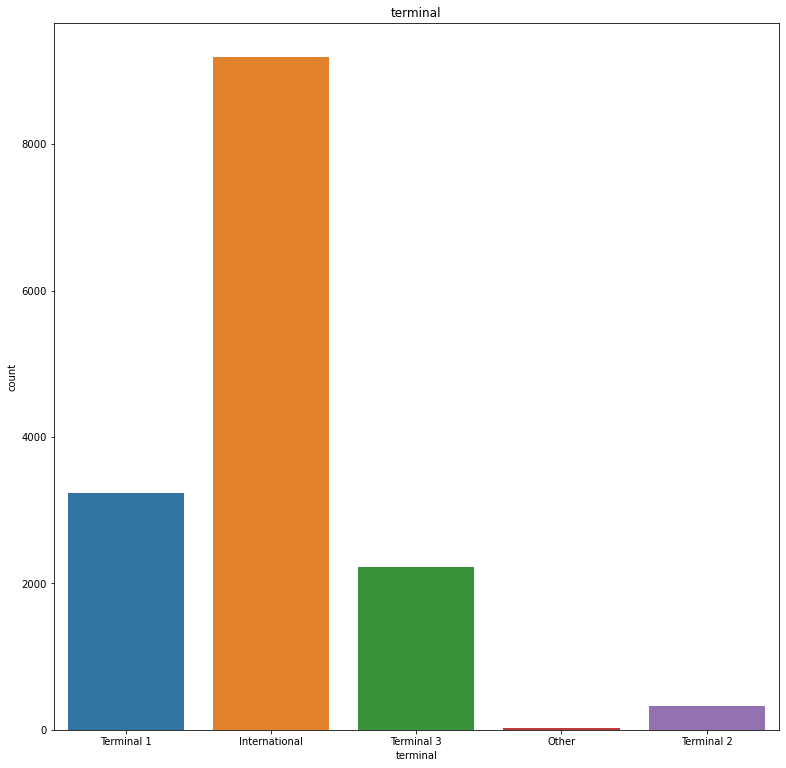

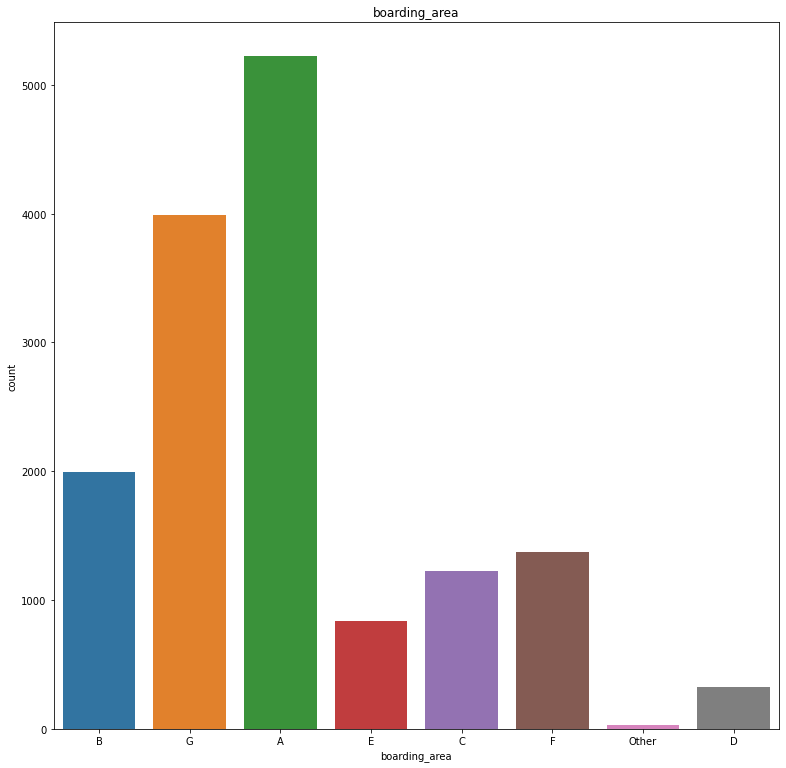

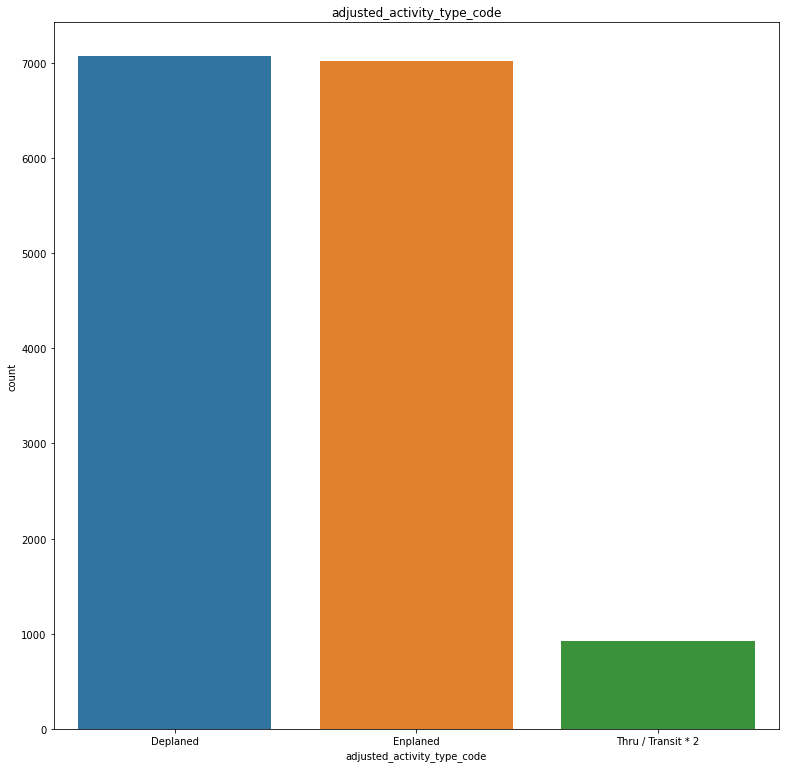

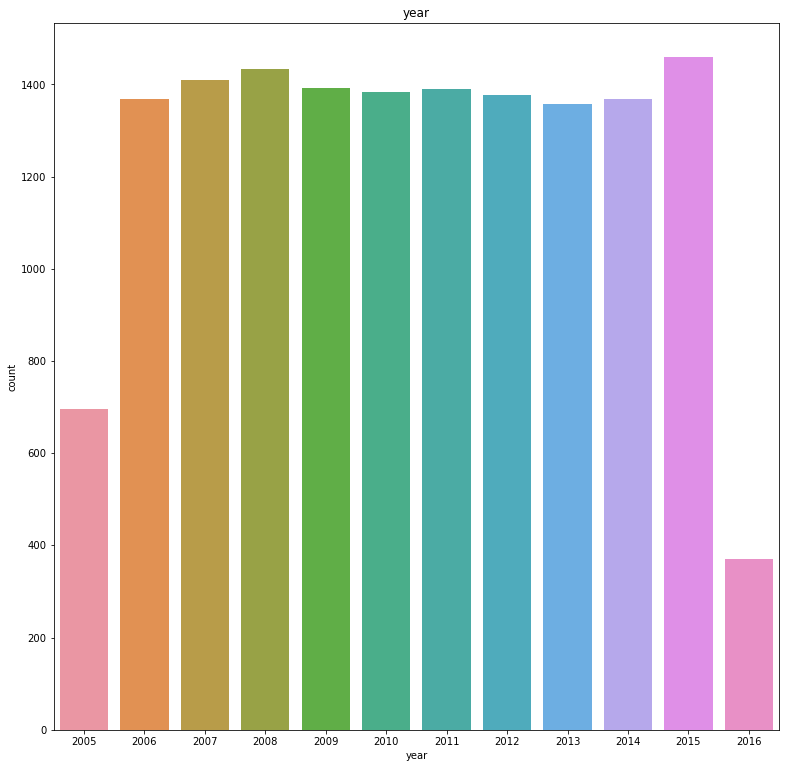

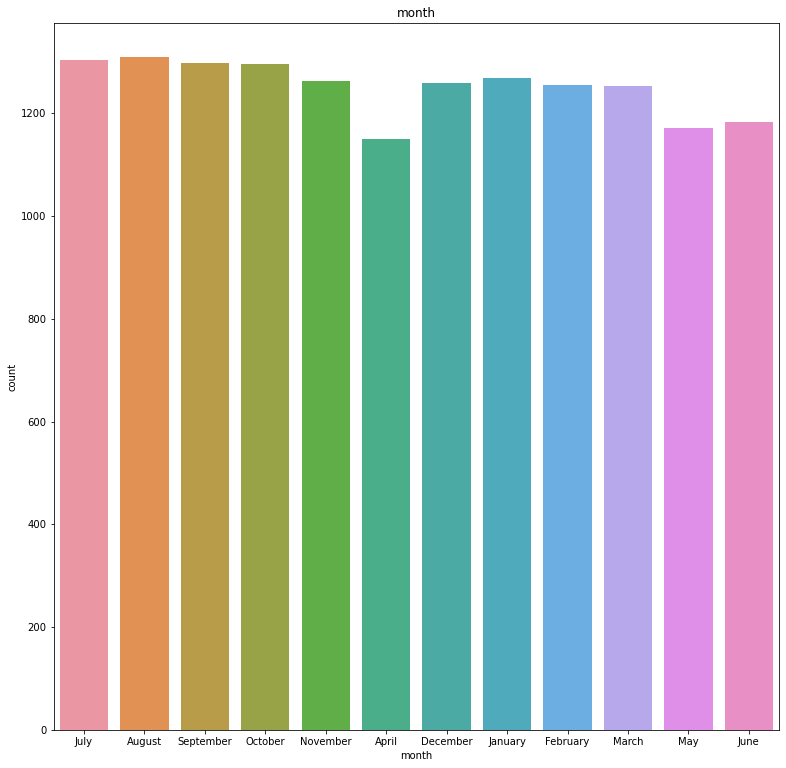

In [26]:
#categorical analysis

for i in cat_list:
    
    plt.figure(figsize=(13,13))
    sns.countplot(x=i,data=data.loc[:,cat_list])
    plt.title(i)

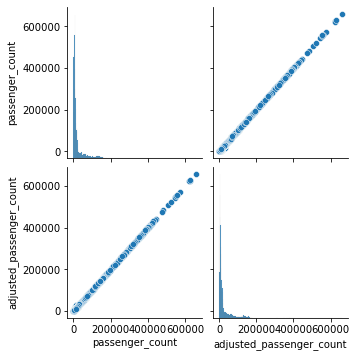

In [27]:
# numerical analsis

sns.pairplot(data.loc[:,num_list]);


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
data["operating_airline"]=le.fit_transform(data["operating_airline"])
data["operating_airline_iata_code"]=le.fit_transform(data["operating_airline_iata_code"])
data["published_airline"]=le.fit_transform(data["published_airline"])
data["published_airline_iata_code"]=le.fit_transform(data["published_airline_iata_code"])
data["geo_summary"]=le.fit_transform(data["geo_summary"])
data["geo_region"]=le.fit_transform(data["geo_region"])
data["activity_type_code"]=le.fit_transform(data["activity_type_code"])
data["price_category_code"]=le.fit_transform(data["price_category_code"])
data["terminal"]=le.fit_transform(data["terminal"])
data["boarding_area"]=le.fit_transform(data["boarding_area"])
data["adjusted_activity_type_code"]=le.fit_transform(data["adjusted_activity_type_code"])
data["month"]=le.fit_transform(data["month"])

In [31]:
data


,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,adjusted_activity_type_code,adjusted_passenger_count,year,month
0,0,60,0,54,0,8,0,0,2,1,27271,0,27271,2005,5
1,0,60,0,54,0,8,1,0,2,1,29131,1,29131,2005,5
2,0,60,0,54,0,8,2,0,2,1,5415,2,10830,2005,5
3,4,6,4,6,1,2,0,1,2,1,35156,0,35156,2005,5
4,4,6,4,6,1,2,1,1,2,1,34090,1,34090,2005,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,71,64,62,58,0,8,1,0,3,3,194636,1,194636,2016,7
15003,71,64,62,58,1,5,0,0,0,0,4189,0,4189,2016,7
15004,71,64,62,58,1,5,1,0,3,3,4693,1,4693,2016,7
15005,72,63,63,57,1,4,0,1,0,0,12313,0,12313,2016,7


In [32]:
kmeans=KMeans().fit(data)

e:\Users\work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
# let's find the optimum number of clusters;
score=[]
K=range(1,10)

for i in K:
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(data)
    score.append(kmeans.inertia_)

e:\Users\work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\Users\work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\Users\work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\Users\work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\Users\work\anaconda3\lib\site-packages\sklearn\cluster\_k

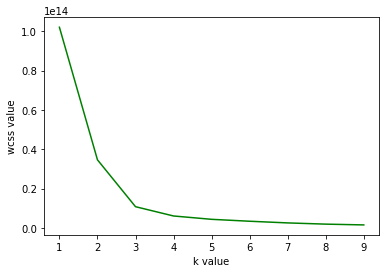

In [34]:
#visualize;

plt.plot(K,score,color="green")
plt.xlabel("k value")
plt.ylabel("wcss value")
plt.show()

In [35]:
#final model;
kmeans=KMeans(n_clusters=3,init="k-means++").fit(data)

e:\Users\work\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
cluster=kmeans.labels_
cluster

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
data["cluster_no"]=cluster


In [38]:
data

,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,adjusted_activity_type_code,adjusted_passenger_count,year,month,cluster_no
0,0,60,0,54,0,8,0,0,2,1,27271,0,27271,2005,5,0
1,0,60,0,54,0,8,1,0,2,1,29131,1,29131,2005,5,0
2,0,60,0,54,0,8,2,0,2,1,5415,2,10830,2005,5,0
3,4,6,4,6,1,2,0,1,2,1,35156,0,35156,2005,5,0
4,4,6,4,6,1,2,1,1,2,1,34090,1,34090,2005,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,71,64,62,58,0,8,1,0,3,3,194636,1,194636,2016,7,2
15003,71,64,62,58,1,5,0,0,0,0,4189,0,4189,2016,7,0
15004,71,64,62,58,1,5,1,0,3,3,4693,1,4693,2016,7,0
15005,72,63,63,57,1,4,0,1,0,0,12313,0,12313,2016,7,0


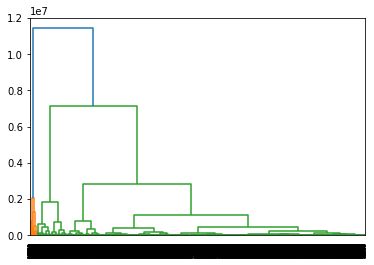

In [39]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(data,method="ward"))
plt.show()

In [40]:
def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    similarity = dot_product / (norm1 * norm2)
    return similarity

# Example usage
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])
similarity_score = cosine_similarity(vector1, vector2)
print(f"Cosine similarity: {similarity_score}")

Cosine similarity: 0.9746318461970762
